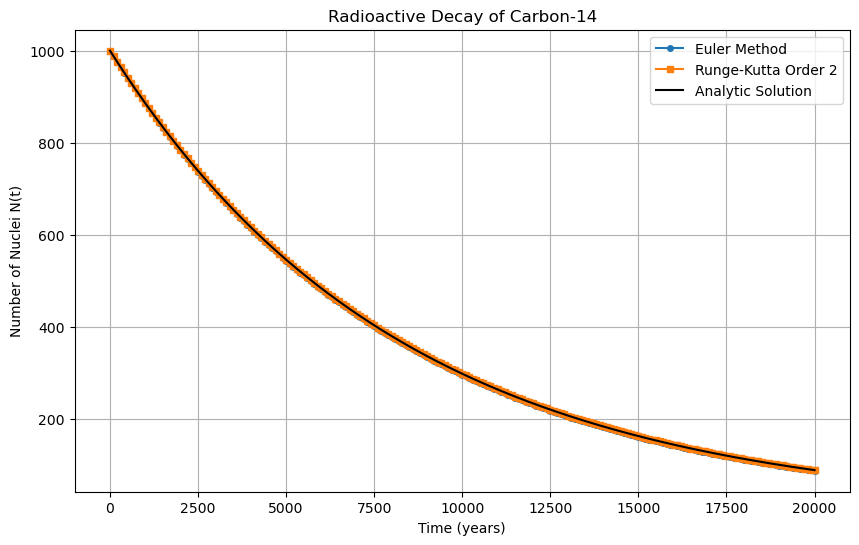

Final N (Euler): 87.62
Final N (RK2): 88.93
Final N (Analytic): 88.92


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the decay constant for Carbon-14
lambda_decay = 1.21e-4  # yr^{-1}

# Define the ODE: dN/dt = -lambda * N
def decay_ode(t, N):
    return -lambda_decay * N

# Euler Method Implementation
def euler_method(f, t0, t_end, N0, dt):
    t_values = np.arange(t0, t_end + dt, dt)
    N_values = np.zeros(len(t_values))
    N_values[0] = N0
    for i in range(1, len(t_values)):
        N_values[i] = N_values[i-1] + dt * f(t_values[i-1], N_values[i-1])
    return t_values, N_values

# Runge-Kutta Order 2 Method Implementation
def rk2_method(f, t0, t_end, N0, dt):
    t_values = np.arange(t0, t_end + dt, dt)
    N_values = np.zeros(len(t_values))
    N_values[0] = N0
    for i in range(1, len(t_values)):
        k1 = f(t_values[i-1], N_values[i-1])
        k2 = f(t_values[i-1] + dt/2, N_values[i-1] + dt/2 * k1)
        N_values[i] = N_values[i-1] + dt * k2
    return t_values, N_values

# Analytic Solution
def analytic_solution(t, N0):
    return N0 * np.exp(-lambda_decay * t)

# Parameters
N0 = 1000           # Initial number of nuclei
t0 = 0             # Start time
t_end = 20000      # End time in years
dt = 100           # Time step in years

# Solve using Euler Method
t_euler, N_euler = euler_method(decay_ode, t0, t_end, N0, dt)

# Solve using Runge-Kutta Order 2 Method
t_rk2, N_rk2 = rk2_method(decay_ode, t0, t_end, N0, dt)

# Compute Analytic Solution
t_analytic = np.linspace(t0, t_end, 1000)
N_analytic = analytic_solution(t_analytic, N0)

# Plotting the Results
plt.figure(figsize=(10, 6))
plt.plot(t_euler, N_euler, 'o-', label='Euler Method', markersize=4)
plt.plot(t_rk2, N_rk2, 's-', label='Runge-Kutta Order 2', markersize=4)
plt.plot(t_analytic, N_analytic, 'k-', label='Analytic Solution')
plt.xlabel('Time (years)')
plt.ylabel('Number of Nuclei N(t)')
plt.title('Radioactive Decay of Carbon-14')
plt.legend()
plt.grid(True)
plt.show()

# Optional: Print final values for comparison
print(f"Final N (Euler): {N_euler[-1]:.2f}")
print(f"Final N (RK2): {N_rk2[-1]:.2f}")
print(f"Final N (Analytic): {N_analytic[-1]:.2f}")


Euler Numerical θ(t=20.0s) with τ=0.005s: 0.06115 radians
RK2 Numerical θ(t=20.0s) with τ=0.005s: 0.05821 radians
Analytical θ(t=20.0s): 0.05821 radians
Discrepancy (Euler): 0.00294 radians
Discrepancy (RK2): 0.00001 radians


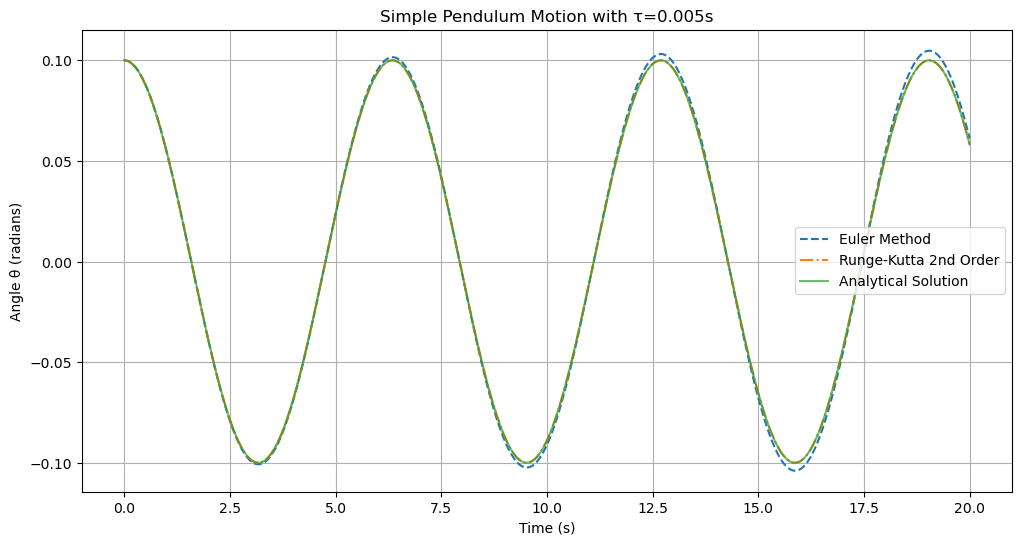

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def euler_method(ode_func, y0, t0, t_end, tau):
    """
    Solves an ODE system using Euler's method.

    Parameters:
    ode_func : function
        Function that computes the derivatives, dy/dt = f(t, y)
    y0 : array_like
        Initial state vector
    t0 : float
        Initial time
    t_end : float
        End time
    tau : float
        Time step size

    Returns:
    t_values : ndarray
        Array of time values
    y_values : ndarray
        Array of state vectors at each time step
    """
    # Number of steps
    N = int((t_end - t0) / tau)
    # Time array
    t_values = np.linspace(t0, t_end, N+1)
    # Initialize array to store state vectors
    y_values = np.zeros((N+1, len(y0)))
    y_values[0] = y0  # Set initial condition
    # Euler integration loop
    for i in range(N):
        t = t_values[i]
        y = y_values[i]
        dydt = ode_func(t, y)
        y_values[i+1] = y + tau * dydt
    return t_values, y_values

def rk2_method(ode_func, y0, t0, t_end, tau):
    """
    Solves an ODE system using the Runge-Kutta 2nd order method.

    Parameters:
    ode_func : function
        Function that computes the derivatives, dy/dt = f(t, y)
    y0 : array_like
        Initial state vector
    t0 : float
        Initial time
    t_end : float
        End time
    tau : float
        Time step size

    Returns:
    t_values : ndarray
        Array of time values
    y_values : ndarray
        Array of state vectors at each time step
    """
    # Number of steps
    N = int((t_end - t0) / tau)
    # Time array
    t_values = np.linspace(t0, t_end, N+1)
    # Initialize array to store state vectors
    y_values = np.zeros((N+1, len(y0)))
    y_values[0] = y0  # Set initial condition
    # RK2 integration loop
    for i in range(N):
        t = t_values[i]
        y = y_values[i]
        k1 = ode_func(t, y)
        k2 = ode_func(t + tau/2, y + tau/2 * k1)
        y_values[i+1] = y + tau * k2
    return t_values, y_values

# Define the ODE function for the simple pendulum
def pendulum_ode(t, y):
    """
    Computes the derivatives for the simple pendulum.

    Parameters:
    t : float
        Current time (not used in this ODE but included for generality)
    y : array_like
        Current state vector [theta, omega]

    Returns:
    dydt : ndarray
        Derivatives [dtheta/dt, domega/dt]
    """
    theta, omega = y
    dtheta_dt = omega
    domega_dt = - (g / l) * theta
    return np.array([dtheta_dt, domega_dt])

# Parameters for the pendulum
g = 9.8        # Acceleration due to gravity (m/s^2)
l = 10.0       # Length of the pendulum (m)
theta0 = 0.1   # Initial angle (radians)
omega0 = 0.0   # Initial angular velocity (rad/s)
tau = 0.005    # Time step size (s)
T = 20.0       # Total simulation time (s)

# Initial conditions and time parameters
y0 = np.array([theta0, omega0])  # Initial state vector [theta, omega]
t0 = 0.0                         # Start time (s)
t_end = T                        # End time (s)

# Solve the ODE using Euler's method
t_euler, y_euler = euler_method(pendulum_ode, y0, t0, t_end, tau)
theta_euler = y_euler[:, 0]  # Extract angle θ from the solution

# Solve the ODE using Runge-Kutta 2nd order method
t_rk2, y_rk2 = rk2_method(pendulum_ode, y0, t0, t_end, tau)
theta_rk2 = y_rk2[:, 0]  # Extract angle θ from the solution

# Analytical solution for comparison
theta_analytical = theta0 * np.cos(np.sqrt(g/l) * t_euler)

# Compute discrepancies at t = T
theta_numerical_euler = theta_euler[-1]
theta_numerical_rk2 = theta_rk2[-1]
theta_true = theta_analytical[-1]
discrepancy_euler = abs(theta_numerical_euler - theta_true)
discrepancy_rk2 = abs(theta_numerical_rk2 - theta_true)

# Print results
print(f"Euler Numerical θ(t={T}s) with τ={tau}s: {theta_numerical_euler:.5f} radians")
print(f"RK2 Numerical θ(t={T}s) with τ={tau}s: {theta_numerical_rk2:.5f} radians")
print(f"Analytical θ(t={T}s): {theta_true:.5f} radians")
print(f"Discrepancy (Euler): {discrepancy_euler:.5f} radians")
print(f"Discrepancy (RK2): {discrepancy_rk2:.5f} radians")

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(t_euler, theta_euler, label='Euler Method', linestyle='--')
plt.plot(t_rk2, theta_rk2, label='Runge-Kutta 2nd Order', linestyle='-.')
plt.plot(t_euler, theta_analytical, label='Analytical Solution', alpha=0.7)
plt.title(f'Simple Pendulum Motion with τ={tau}s')
plt.xlabel('Time (s)')
plt.ylabel('Angle θ (radians)')
plt.legend()
plt.grid(True)
plt.show()


### ADAPT TO Radioactiv decay for example


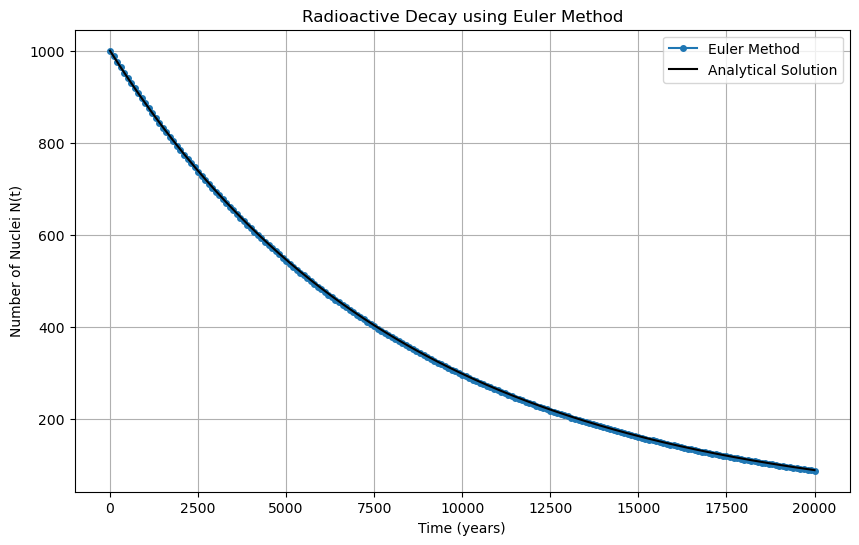

In [4]:
# Define the ODE function for radioactive decay
def decay_ode(t, N):
    """
    Computes the derivative for radioactive decay.

    Parameters:
    t : float
        Current time (s)
    N : array_like
        Current number of nuclei

    Returns:
    dNdt : ndarray
        Derivative [dN/dt]
    """
    lambda_decay = 1.21e-4  # Decay constant (yr^-1)
    dNdt = -lambda_decay * N
    return np.array([dNdt])

# Initial condition
N0 = np.array([1000])  # Initial number of nuclei
t0 = 0                 # Start time (yr)
t_end = 20000          # End time (yr)
tau = 100              # Time step (yr)

# Solve using Euler's method
t_values, N_values = euler_method(decay_ode, N0, t0, t_end, tau)
N_numerical = N_values[:, 0]

# Analytical solution
N_analytic = N0[0] * np.exp(-1.21e-4 * t_values)

# Plotting
plt.figure(figsize=(10,6))
plt.plot(t_values, N_numerical, 'o-', label='Euler Method', markersize=4)
plt.plot(t_values, N_analytic, 'k-', label='Analytical Solution')
plt.xlabel('Time (years)')
plt.ylabel('Number of Nuclei N(t)')
plt.title('Radioactive Decay using Euler Method')
plt.legend()
plt.grid(True)
plt.show()


Displacement at t = 20 s:
Analytical: -0.49998 m
Euler Method: -0.52038 m
Discrepancy (Euler): 0.02040 m
RK45 Method: -0.49977 m
Discrepancy (RK45): 0.00021 m


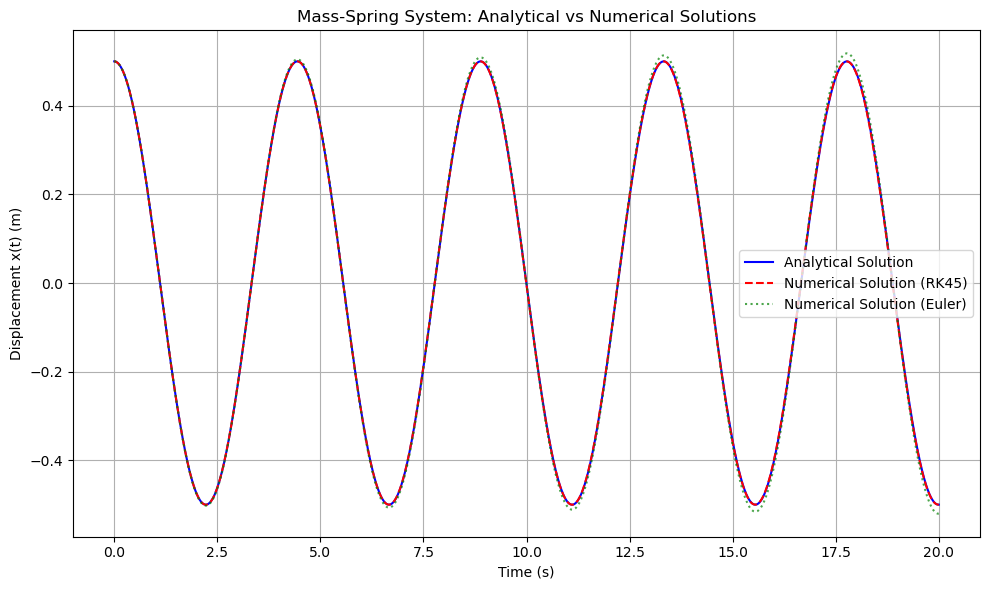

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

m = 5.0      # Mass (kg)
k = 10.0     # Spring constant (N/m)

# --- Initial Conditions ---
x0 = 0.5     # Initial displacement (m)
v0 = 0.0     # Initial velocity (m/s)
y0 = [x0, v0]  # Initial state vector [x, v]

# --- Time Parameters ---
t_start = 0          # Start time (s)
t_end = 20           # End time (s)
num_points = 10000   # Number of points for evaluation
t_eval = np.linspace(t_start, t_end, num_points)
tau = (t_end - t_start) / num_points  # Time step size for Euler

# --- Analytical Solution (Optional) ---
omega = np.sqrt(k / m)  # Angular frequency
def analytical_solution(t):
    return x0 * np.cos(omega * t) + (v0 / omega) * np.sin(omega * t)

# =========================
# ODE System Definition
# =========================

def ode_system(t, y):
    """
    Defines the ODE system.

    Parameters:
    - t: Time variable (unused for autonomous systems)
    - y: State vector (e.g., [x, v])

    Returns:
    - dydt: Derivatives of the state vector
    """
    x, v = y
    dxdt = v
    dvdt = - (k / m) * x
    return [dxdt, dvdt]

# =========================
# Euler Method Implementation
# =========================

def euler_method(ode_func, y0, t0, t_end, tau):
    """
    Solves an ODE system using Euler's method.

    Parameters:
    - ode_func: Function that returns derivatives, dy/dt = f(t, y)
    - y0: Initial state vector
    - t0: Initial time
    - t_end: End time
    - tau: Time step size

    Returns:
    - t_values: Array of time points
    - y_values: Array of state vectors at each time point
    """
    N = int((t_end - t0) / tau)
    t_values = np.linspace(t0, t_end, N+1)
    y_values = np.zeros((N+1, len(y0)))
    y_values[0] = y0

    for i in range(N):
        dydt = ode_func(t_values[i], y_values[i])
        y_values[i+1] = y_values[i] + tau * np.array(dydt)

    return t_values, y_values

# =========================
# Numerical Solutions
# =========================

# --- Solve using Euler's Method ---
t_euler, y_euler = euler_method(ode_system, y0, t_start, t_end, tau)
x_euler = y_euler[:, 0]  # Displacement from Euler's method

# --- Solve using solve_ivp (RK45) ---
solution_rk45 = solve_ivp(
    ode_system,
    [t_start, t_end],
    y0,
    t_eval=t_eval,
    method='RK45'
)
x_rk45 = solution_rk45.y[0]
v_rk45 = solution_rk45.y[1]

# =========================
# Analytical Solution
# =========================

x_analytical = analytical_solution(t_eval)

# =========================
# Discrepancy Calculation
# =========================

# Choose the final time point for discrepancy
final_time = t_end

# --- Euler Method Discrepancy ---
x_euler_final = x_euler[-1]
x_true_final = analytical_solution(final_time)
discrepancy_euler = abs(x_euler_final - x_true_final)

# --- RK45 Method Discrepancy ---
x_rk45_final = x_rk45[-1]
discrepancy_rk45 = abs(x_rk45_final - x_true_final)

print(f"Displacement at t = {final_time} s:")
print(f"Analytical: {x_true_final:.5f} m")
print(f"Euler Method: {x_euler_final:.5f} m")
print(f"Discrepancy (Euler): {discrepancy_euler:.5f} m")
print(f"RK45 Method: {x_rk45_final:.5f} m")
print(f"Discrepancy (RK45): {discrepancy_rk45:.5f} m")

plt.figure(figsize=(10, 6))
plt.plot(t_eval, x_analytical, label='Analytical Solution', color='blue')
plt.plot(t_eval, x_rk45, '--', label='Numerical Solution (RK45)', color='red')
plt.plot(t_euler, x_euler, ':', label='Numerical Solution (Euler)', color='green', alpha=0.7)
plt.title('Mass-Spring System: Analytical vs Numerical Solutions')
plt.xlabel('Time (s)')
plt.ylabel('Displacement x(t) (m)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [6]:
import numpy as np
from scipy.integrate import simpson

# Load data from a text file; assume first column is R and second is Σ(R)
data = np.loadtxt('surface_luminosity.txt')
R = data[:, 0]        # Radial distances
Sigma = data[:, 1]    # Surface luminosity

# Compute the integrand Σ(R) * 2πR
f_R = Sigma * 2 * np.pi * R

# Trapezoidal rule for numerical integration
delta_R = np.diff(R)                  # Differences between consecutive R values
integral_trapz = np.sum((f_R[:-1] + f_R[1:]) * delta_R / 2)
print("Total Luminosity L using the Trapezoidal Rule:", integral_trapz)

# Simpson's rule for numerical integration using scipy
integral_simpson = simpson(f_R, x=R)  # Handles unevenly spaced points
print("Total Luminosity L using Simpson's rule with scipy:", integral_simpson)


Total Luminosity L using the Trapezoidal Rule: 1285408.7095045173
Total Luminosity L using Simpson's rule with scipy: 1282549.6319938095


In [7]:
import numpy as np
from scipy.integrate import simpson

# Define data directly in the code
R = np.array([0.0, 1.0, 2.0, 3.0, 4.0])         # Radial distances
Sigma = np.array([0.0, 10.0, 20.0, 30.0, 40.0])  # Surface luminosity

# Compute the integrand Σ(R) * 2πR
f_R = Sigma * 2 * np.pi * R

# Trapezoidal rule for numerical integration
delta_R = np.diff(R)                             # Differences between consecutive R values
integral_trapz = np.sum((f_R[:-1] + f_R[1:]) * delta_R / 2)
print("Total Luminosity L using the Trapezoidal Rule:", integral_trapz)

# Simpson's rule for numerical integration using scipy
integral_simpson = simpson(f_R, x=R)             # Handles unevenly spaced points
print("Total Luminosity L using Simpson's rule with scipy:", integral_simpson)


Total Luminosity L using the Trapezoidal Rule: 1382.3007675795088
Total Luminosity L using Simpson's rule with scipy: 1340.412865531645


Derivative of f1: [ 1.21905502  1.34398344  1.47491211  1.61205642  1.75559033  1.90564525
  2.06230918  2.22562607  2.39559558  2.57217306  2.75526985  2.94475387
  3.1404505   3.34214374  3.54957764  3.76245804  3.9804545   4.20320249
  4.43030585  4.6613394   4.8958518   5.13336852  5.37339504  5.61542011
  5.85891917  6.10335786  6.34819555  6.59288895  6.83689572  7.07967812
  7.32070655  7.5594631   7.79544496  8.02816785  8.25716915  8.48201106
  8.70228346  8.91760668  9.12763399  9.33205396  9.53059248  9.72301464
  9.90912623 10.0887751  10.26185214 10.42829199 10.58807351 10.74121991
 10.88779857 10.88779857]
Derivative of f2: [-4.19248054e-01 -7.08118789e-01 -1.01648187e+00 -1.34259440e+00
 -1.68456523e+00 -2.04034233e+00 -2.40769918e+00 -2.78421983e+00
 -3.16728288e+00 -3.55404392e+00 -3.94141663e+00 -4.32605217e+00
 -4.70431685e+00 -5.07226791e+00 -5.42562725e+00 -5.75975286e+00
 -6.06960791e+00 -6.34972714e+00 -6.59418045e+00 -6.79653331e+00
 -6.94980392e+00 -7.04641662e

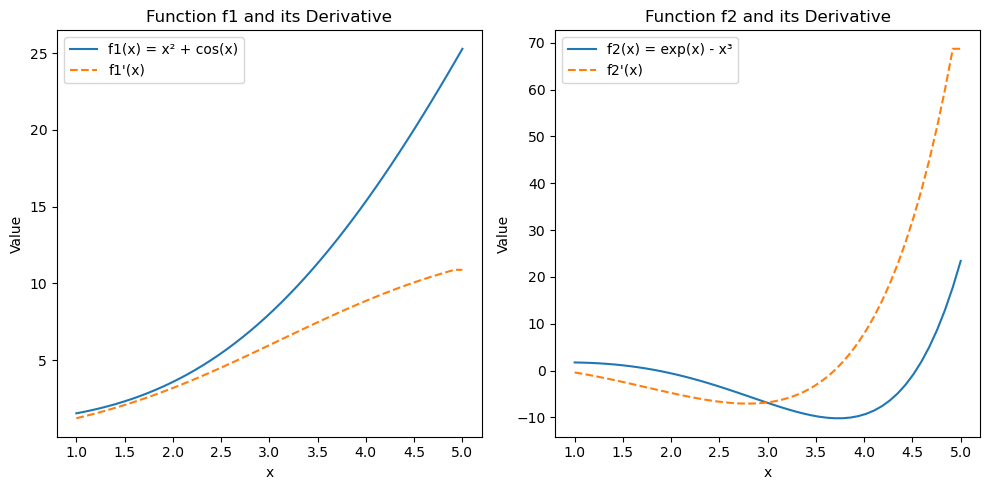

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Number of points
N = 50

# Generate x values between 1 and 5
x_values = np.linspace(1, 5, N)

# Calculate the spacing between x values
dx = x_values[1] - x_values[0]

# Define the first function f1(x) = x^2 + cos(x)
def f1(x):
    return x**2 + np.cos(x)

# Define the second function f2(x) = exp(x) - x^3
def f2(x):
    return np.exp(x) - x**3

# Compute function values
f1_values = f1(x_values)
f2_values = f2(x_values)

# Numerical derivative function using finite differences
def num_derivative(values, dx):
    derivative = np.zeros_like(values)
    # Forward difference for all points except the last
    derivative[:-1] = (values[1:] - values[:-1]) / dx
    # Backward difference for the last point
    derivative[-1] = (values[-1] - values[-2]) / dx
    return derivative

# Calculate derivatives
f1_der = num_derivative(f1_values, dx)
f2_der = num_derivative(f2_values, dx)

# Print the derivatives
print("Derivative of f1:", f1_der)
print("Derivative of f2:", f2_der)

# Plotting the functions and their derivatives
plt.figure(figsize=(10, 5))

# Plot for f1 and its derivative
plt.subplot(1, 2, 1)
plt.plot(x_values, f1_values, label="f1(x) = x² + cos(x)")
plt.plot(x_values, f1_der, label="f1'(x)", linestyle='--')
plt.legend()
plt.xlabel('x')
plt.ylabel('Value')
plt.title('Function f1 and its Derivative')

# Plot for f2 and its derivative
plt.subplot(1, 2, 2)
plt.plot(x_values, f2_values, label="f2(x) = exp(x) - x³")
plt.plot(x_values, f2_der, label="f2'(x)", linestyle='--')
plt.legend()
plt.xlabel('x')
plt.ylabel('Value')
plt.title('Function f2 and its Derivative')

# Adjust layout and display plots
plt.tight_layout()
plt.show()


In [9]:
import math

def bisect(f, a, b, N):
    """
    Bisection method to find a root of the function f within [a, b] over N iterations.
    """
    # Check if the initial interval is valid
    if f(a) * f(b) >= 0:
        print("Bisection method fails. f(a) and f(b) must have opposite signs.")
        return None
    
    a_n = a
    b_n = b
    
    for n in range(1, N + 1):
        # Compute the midpoint
        m_n = (a_n + b_n) / 2
        f_m_n = f(m_n)
        
        # Check if the midpoint is a root
        if f(a_n) * f_m_n < 0:
            b_n = m_n  # Root is in [a_n, m_n]
        elif f(b_n) * f_m_n < 0:
            a_n = m_n  # Root is in [m_n, b_n]
        elif f_m_n == 0:
            print(f"Exact solution found at iteration {n}: x = {m_n}")
            return m_n
        else:
            print("Bisection method fails. No root found.")
            return None
    
    # Return the midpoint as the approximate root after N iterations
    return (a_n + b_n) / 2

# Define the function for which we want to find the root
f = lambda x: math.exp(x) - 1 - x - (x**2 / 2)

# Apply the bisection method to find the root within the interval [-1, 2] over 100 iterations
approx_bi = bisect(f, -1, 2, 100)
print("Approximate root found by bisection method:", approx_bi)


Exact solution found at iteration 17: x = 7.62939453125e-06
Approximate root found by bisection method: 7.62939453125e-06


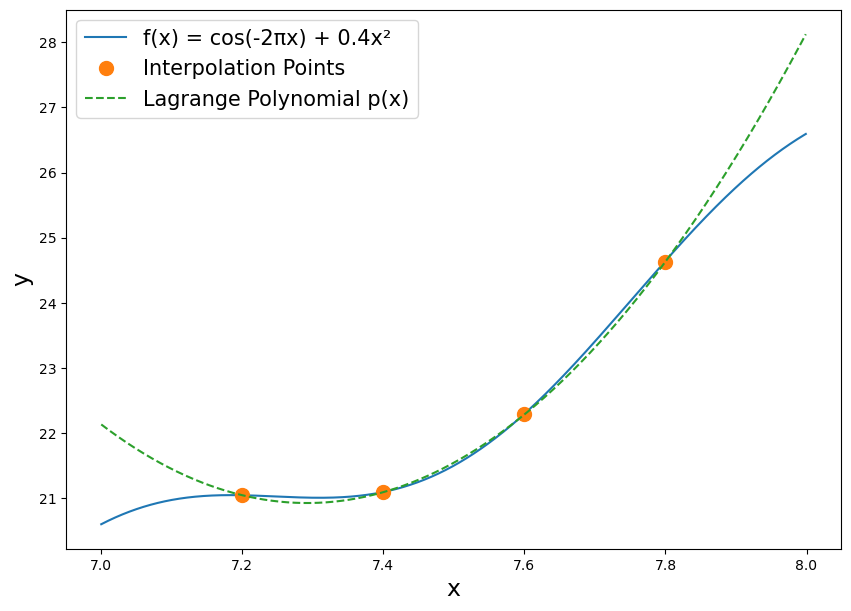

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

# Define the range for x values
x = np.arange(7, 8, 0.001)  # Dummy range for the function

# Define the function f(x) = cos(-2πx) + 0.4x²
y = np.cos(-2 * np.pi * x) + 0.4 * x**2  # Function values

# Define interpolation points
xi = np.array([7.2, 7.4, 7.6, 7.8])  # Points for interpolation
yi = y[np.digitize(xi, x) - 1]       # Corresponding y values at interpolation points

# Compute the Lagrange polynomial for the interpolation points
lagrange_poly = lagrange(xi, yi)
y_lagrange = lagrange_poly(x)

# Plotting the original function and its Lagrange interpolation
fig, ax = plt.subplots(figsize=(10, 7))

# Plot the original function f(x)
ax.plot(x, y, label='f(x) = cos(-2πx) + 0.4x²')

# Plot the interpolation points
ax.plot(xi, yi, 'o', markersize=10, label='Interpolation Points')

# Plot the Lagrange polynomial p(x)
ax.plot(x, y_lagrange, label='Lagrange Polynomial p(x)', linestyle='--')

# Labeling the axes
ax.set_xlabel('x', fontsize=17)
ax.set_ylabel('y', fontsize=17)

# Adding a legend to distinguish the plots
ax.legend(loc='best', fontsize=15)

# Display the plot
plt.show()


In [11]:
import numpy as np
from scipy.linalg import lu

# Define matrix A and vector b for the system Ax = b
A = np.array([[5, 3],
              [1, -4]])
b = np.array([15, -2])

# Solve the system using NumPy's linear solver
x = np.linalg.solve(A, b)
print("Solution for x using np.linalg.solve:", x)

# Perform LU decomposition of matrix A
P, L, U = lu(A)

# Display the L and U matrices
print("\nL matrix:")
print(L)
print("\nU matrix:")
print(U)

# Solve the system using LU decomposition
Pb = np.dot(P, b)           # Apply permutation matrix to b
y = np.linalg.solve(L, Pb)  # Solve Ly = Pb for y
x1 = np.linalg.solve(U, y)  # Solve Ux = y for x

print("\nSolution for x using LU decomposition:", x1)

# Verify the solution
is_solution = np.allclose(np.dot(A, x1), b)
print("\nIs the solution valid?", is_solution)

# Define another system with a different matrix and vector
A2 = np.array([[1, -4],
               [5, 3]])
b2 = np.array([3, -7])

# Solve the new system using NumPy's linear solver
x2 = np.linalg.solve(A2, b2)
print("\nSolution for x in the second system:", x2)


Solution for x using np.linalg.solve: [2.34782609 1.08695652]

L matrix:
[[1.  0. ]
 [0.2 1. ]]

U matrix:
[[ 5.   3. ]
 [ 0.  -4.6]]

Solution for x using LU decomposition: [2.34782609 1.08695652]

Is the solution valid? True

Solution for x in the second system: [-0.82608696 -0.95652174]


In [19]:
import numpy as np
from scipy.optimize import fsolve, newton_krylov, root

# Define the system of nonlinear equations
def system_equations(x):
    """
    Example System:
    Equation 1: x0 + x1^2 - 4 = 0
    Equation 2: exp(x0) + x1 - 3 = 0
    """
    x0, x1 = x
    eq1 = x0 + x1**2 - 4
    eq2 = np.exp(x0) + x1 - 3
    return [eq1, eq2]

# Initial guess for the solution
x_initial = np.array([1.0, 1])

# Solve using fsolve
solution_fsolve = fsolve(system_equations, x_initial)
print("Solution using fsolve:", solution_fsolve)

# Solve using newton_krylov
solution_newton_krylov = newton_krylov(system_equations, x_initial)
print("Solution using newton_krylov:", solution_newton_krylov)

# Solve using root with Broyden's first method
solution_broyden1 = root(system_equations, x_initial, method='broyden1')
print("Solution using root with broyden1:", solution_broyden1.x)



Solution using fsolve: [-2.89472191e-11  2.00000000e+00]
Solution using newton_krylov: [ 1.52052677 -1.57463432]
Solution using root with broyden1: [-1.13427737e-07  2.00000001e+00]
